In [5]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
import numpy as np
import cv2
import sys
import cv2
from matplotlib import pyplot as plt
from pylab import rcParams
from tensorflow.keras.models import load_model
rcParams['figure.figsize'] = 15, 15

In [52]:

#model = VGG16(weights="imagenet")
#model = VGG16(weights='CNN_Classifier/weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')
model = VGG16(weights='E:/Downloads/VGG16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')

img_path = '2_DAPT50ISC_8.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [53]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

In [54]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [55]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

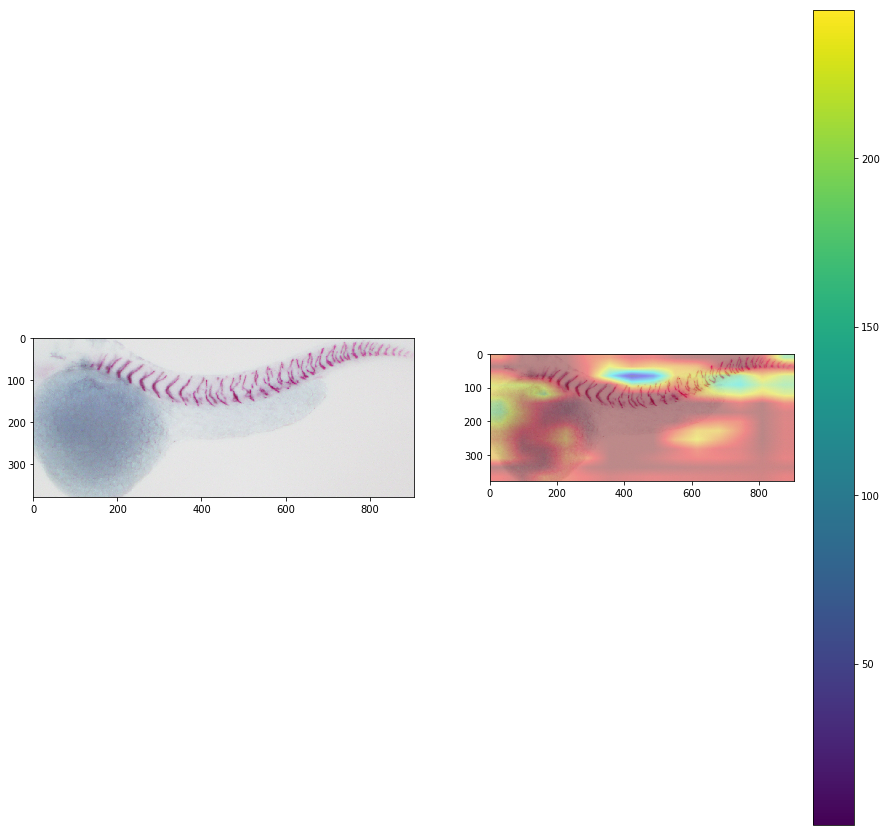

In [56]:
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(superimposed_img)
plt.colorbar()
cv2.imshow("Original", img)
cv2.imshow("GradCam", superimposed_img)
#cv2.imshow('masked_img',masked_img)
#cv2.imshow('image9',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
img_path = 'C:/Users/Kaleem/EPFL/ZebrafishProject/Images/DataPNG/4thPhenotypePNG/3_DAPT50ISC_24_1.png'
img_2 = image.load_img(img_path, target_size=(100, 100))
x_new = image.img_to_array(img_2)
x_new = np.expand_dims(x_new, axis=0)
x_new = preprocess_input(x_new)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


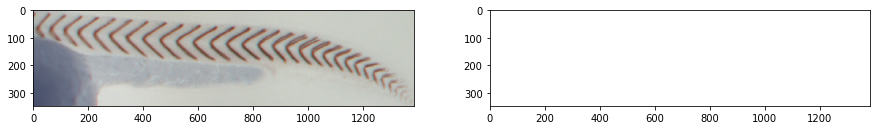

In [150]:
img_path = 'C:/Users/Kaleem/EPFL/ZebrafishProject/Images/DataPNG/WildtypePNG/gui30.png'
img_2 = image.load_img(img_path, target_size=(100, 100))
x_new = image.img_to_array(img_2)
x_new = np.expand_dims(x_new, axis=0)
x_new = preprocess_input(x_new)

preds_1 = model1.predict(x_new)
class_idx_1 = np.argmax(preds_1[0])
class_output_1 = model1.output[:,class_idx_1]
last_conv_layer_1 = model1.get_layer("block5_conv3")

grads = K.gradients(class_output_1, last_conv_layer_1.output)[0]
pooled_grads_1 = K.mean(grads, axis=(0, 1, 2))
iterate_1 = K.function([model1.input], [pooled_grads_1, last_conv_layer_1.output[0]])
pooled_grads_value_1, conv_layer_output_value_1 = iterate_1([x_new])
for i in range(512):
    conv_layer_output_value_1[:, :, i] *= pooled_grads_value_1[i]

heatmap = np.mean(conv_layer_output_value_1, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
superimposed_img_1 = heatmap * 0.4 + img
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(superimposed_img_1)
#plt.colorbar()

#cv2.imshow("GradCam", superimposed_img_1)
#cv2.imshow('Original',img)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

###### print(preds)
class_idx_1 = np.argmax(preds_1[0])
print(preds_1)
print(class_idx_1)

In [8]:
# load model
model1 = load_model('model_1.h5')
# summarize model.
model1.summary()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________